In [1]:
import pandas as pd

# DataFrame example with movies

## 1 - Acquire data

In [2]:
movies = pd.read_csv('./movielens/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('./movielens/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## 2 - Prepare data

First, remove timestamps, not needed

In [4]:
del ratings['timestamp']
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


Then, look at some statistics

In [5]:
movies.shape

(27278, 3)

In [6]:
ratings.shape

(20000263, 3)

In [7]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Now, some visualization

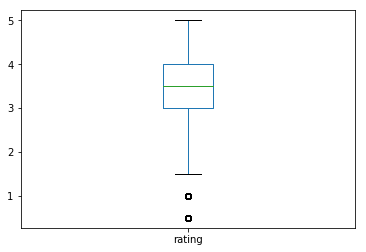

In [8]:
%matplotlib inline

ratings['rating'].plot.box()

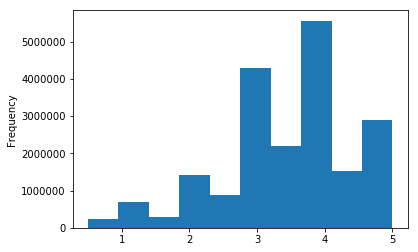

In [9]:
ratings['rating'].plot.hist()

## 3 - Analyze data

### Computing average rating per movie

In [10]:
avg_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
avg_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


### Computing number of ratings per movie

In [11]:
cnt_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).count()
cnt_rating.head()

,movieId,rating
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161


### Merge frames

In [12]:
movies = movies.merge(avg_rating, on='movieId').merge(cnt_rating, on='movieId')
movies.head()

,movieId,title,genres,rating_x,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161


### Rename columns

In [13]:
movies['avg_rating'] = movies.pop('rating_x')
movies.head()

,movieId,title,genres,rating_y,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,49695,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,12735,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2756,2.861393
4,5,Father of the Bride Part II (1995),Comedy,12161,3.064592


In [14]:
movies['rating_count'] = movies.pop('rating_y')
movies.head()

,movieId,title,genres,avg_rating,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,49695
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,22243
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,12735
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2756
4,5,Father of the Bride Part II (1995),Comedy,3.064592,12161


## 4 - Report

### Use filters

In [15]:
is_good = movies['avg_rating'] >= 4.0
is_reviewed = movies['rating_count'] > 100

In [16]:
def best_of(genre):
    '''Returns a dataframe with all the movies for the given genre
    that have at least 100 ratings and average rating >= 4.0, sorted by average rating.
    '''
    is_genre = movies['genres'].str.contains(genre)
    best = movies[is_good & is_reviewed & is_genre].sort_values('avg_rating', ascending=False)
    print('There are {} high-rated movies for {}'.format(len(best), genre))
    return best

In [17]:
best_of('Fantasy')

There are 23 high-rated movies for Fantasy


,movieId,title,genres,avg_rating,rating_count
5519,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,4.203810,13466
1172,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.176732,32586
1113,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.174146,33024
5872,5971,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy,4.149481,5489
7041,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,4.142382,31577
4897,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.137925,37553
5853,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,4.107521,33947
2914,3000,Princess Mononoke (Mononoke-hime) (1997),Action|Adventure|Animation|Drama|Fantasy,4.096299,9564
6987,7099,Nausicaä of the Valley of the Wind (Kaze no ta...,Adventure|Animation|Drama|Fantasy|Sci-Fi,4.092082,3334
9742,31658,Howl's Moving Castle (Hauru no ugoku shiro) (2...,Adventure|Animation|Fantasy|Romance,4.066078,5607


## 5 - Action

For your favorite genre, go watch the best movies you haven't seen yet. :)